![image.png](attachment:image.png)

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
X_train = pd.read_csv('/content/drive/MyDrive/X_train_comp.csv')
y_train = pd.read_csv('/content/drive/MyDrive/y_train.txt', sep=' ', header=None)
X_test = pd.read_csv('/content/drive/MyDrive/X_test_comp.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test.txt', sep=' ', header=None)

### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [179]:
# calculando os ccp_alphas utilizando as melhores variáveis identificadas no exercício anterior

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [180]:
# garantindo que os ccp_alphas são únicos e positivos

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [181]:
%%time

clf = DecisionTreeClassifier(random_state=2360873)
grid_parametros = {'ccp_alpha':ccp_alphas}
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10)
grid.fit(X_train[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_train)



CPU times: user 34.5 s, sys: 63.1 ms, total: 34.5 s
Wall time: 34.7 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.23777219e-07, 5.44995104e-06, 6.96674540e-06,
       7.04310757e-06, 7.64604257e-06, 9.48000132e-06, 9.51056033e-06,
       9.97461008e-06, 1.10593595e-05, 1.82436050e-05, 2.47390551e-05,
       2.96765259e-05, 3.15544286e-05, 3.69307877e-05, 4.13966031e-05,
       4.219...
       1.20133204e-03, 1.25126209e-03, 1.40661682e-03, 1.48212491e-03,
       1.67487823e-03, 1.78389909e-03, 1.93520433e-03, 2.00403134e-03,
       2.09941305e-03, 2.30144574e-03, 2.40743372e-03, 2.49787393e-03,
       2.62823385e-03, 2.65096886e-03, 3.09222797e-03, 3.81607263e-03,
       4.29651934e-03, 4.90778373e-03, 5.38489539e-03, 6.98899314e-03,
       7.14303075e-03, 1.03332221e-02, 3.47995139e-02, 7.61968072e-02,
       1.09363718e-01, 1.67221582e-01, 1.85811143e-01])})

In [182]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024043,0.000804,0.004031,0.000719,0.0,{'ccp_alpha': 0.0},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63
1,0.025107,0.001254,0.004084,0.000750,0.0,{'ccp_alpha': 1.2377721861031067e-07},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63
2,0.024996,0.001003,0.003882,0.000057,0.000005,{'ccp_alpha': 5.449951042985827e-06},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63
3,0.024888,0.002109,0.004182,0.000867,0.000007,{'ccp_alpha': 6.966745401948242e-06},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63
4,0.025310,0.002337,0.004116,0.000848,0.000007,{'ccp_alpha': 7.043107569088057e-06},0.790761,0.751359,0.793197,0.677551,0.790476,0.768707,0.802721,0.77551,0.820408,0.767347,0.773804,0.037133,63


resultados.loc[resultados['rank_test_score'] == 1]

In [183]:
grid.best_score_

0.8248042369121562

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [184]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.0042965193422309055

In [185]:

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_train)

In [186]:
clf.score(X_test[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_test)

0.7241262300644723

In [187]:
predicoes = clf.predict(X_test[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']])

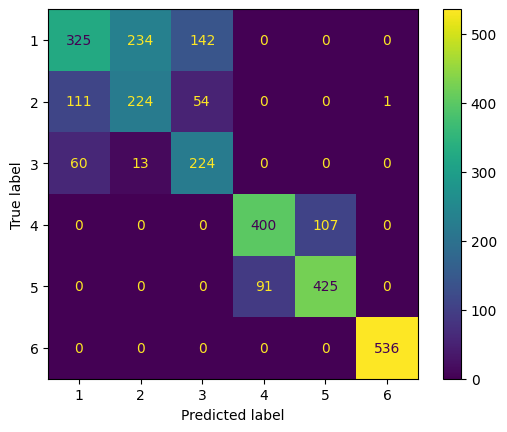

In [188]:

ConfusionMatrixDisplay.from_predictions(predicoes, y_test)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

*A classe mais difícil de identificar foi a "2"*

In [189]:
# criando  uma variável binária para uma das classes de maior erro (classe 2)

y_train.columns = ['status']
y_test.columns = ['status']

X_train['status_2'] = pd.get_dummies(y_train, columns=['status'])['status_2']
X_test['status_2'] = pd.get_dummies(y_test, columns=['status'])['status_2']

In [190]:
# rodando  uma árvore de classificação bem simples para esta variável

clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, max_depth=4).fit(X_train, y_train)

In [191]:
# Observando a importância das variáveis, e selecione as 3 com maior importância

indice_importancia = []

lista_importancia = clf.feature_importances_

while len(indice_importancia) < 3:

  indice_importancia.append(np.argmax(lista_importancia))

  lista_importancia[np.argmax(lista_importancia)] = 0


X_train.columns[indice_importancia] # As 3 variáveis com maior importância

Index(['tGravityAcc-min()-X', 'fBodyAcc-mad()-X', 'status_2'], dtype='object')

In [192]:
# Rodando novamente o algoritmo acima com as 3 novas variáveis

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train[['tGravityAcc-min()-X', 'fBodyAccJerk-entropy()-X', 'status_2']], y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [193]:

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [194]:
clf = DecisionTreeClassifier(random_state=2360873)
grid_parametros = {'ccp_alpha':ccp_alphas}
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10)
grid.fit(X_train[['tGravityAcc-min()-X', 'fBodyAccJerk-entropy()-X', 'status_2']], y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.11975185e-06, 6.08120167e-06, 6.80087051e-06,
       7.37304991e-06, 7.47616671e-06, 8.05000999e-06, 8.74397637e-06,
       1.31301283e-05, 1.40830969e-05, 1.87463842e-05, 1.88331799e-05,
       1.99410140e-05, 2.12649915e-05, 2.51689588e-05, 2.87410702e-05,
       2.877...
       5.67351270e-04, 6.06390749e-04, 6.35547857e-04, 6.77244688e-04,
       7.02310208e-04, 7.23212118e-04, 7.72246123e-04, 7.80284700e-04,
       7.90506073e-04, 8.24499022e-04, 1.09173441e-03, 1.11364756e-03,
       1.25905756e-03, 1.36601607e-03, 1.99269596e-03, 2.07977928e-03,
       2.16105433e-03, 2.17169034e-03, 7.30382925e-03, 2.24888600e-02,
       3.62773785e-02, 1.47968202e-01, 1.67148656e-01, 1.86138242e-01])})

In [195]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024351,0.001193,0.005845,0.000224,0.0,{'ccp_alpha': 0.0},0.724185,0.722826,0.738776,0.710204,0.722449,0.706122,0.69932,0.733333,0.765986,0.703401,0.72266,0.018967,76
1,0.025641,0.001192,0.006603,0.001422,0.000002,{'ccp_alpha': 2.119751847716976e-06},0.724185,0.722826,0.738776,0.710204,0.722449,0.706122,0.69932,0.733333,0.765986,0.703401,0.72266,0.018967,76
2,0.024921,0.001045,0.005774,0.000192,0.000006,{'ccp_alpha': 6.0812016742376514e-06},0.724185,0.722826,0.738776,0.710204,0.722449,0.706122,0.69932,0.733333,0.765986,0.703401,0.72266,0.018967,76
3,0.025042,0.000787,0.006147,0.000967,0.000007,{'ccp_alpha': 6.800870511425479e-06},0.724185,0.722826,0.738776,0.710204,0.722449,0.706122,0.69932,0.733333,0.765986,0.703401,0.72266,0.018967,76
4,0.026573,0.003863,0.006858,0.001642,0.000007,{'ccp_alpha': 7.373049905103242e-06},0.724185,0.722826,0.738776,0.710204,0.722449,0.706122,0.69932,0.733333,0.765986,0.703401,0.72266,0.018967,76


In [196]:
grid.best_score_

0.7819681677018633

In [197]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.007303829246539828

In [198]:
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train[['tGravityAcc-min()-X', 'fBodyAccJerk-entropy()-X', 'status_2']], y_train)

In [199]:
# Avaliando o score na base de teste

clf.score(X_test[['tGravityAcc-min()-X', 'fBodyAccJerk-entropy()-X', 'status_2']], y_test)

0.7451645741431965

In [200]:
previsoes = clf.predict(X_test[['tGravityAcc-min()-X', 'fBodyAccJerk-entropy()-X', 'status_2']])

previsoes

array([5, 5, 5, ..., 2, 2, 2])

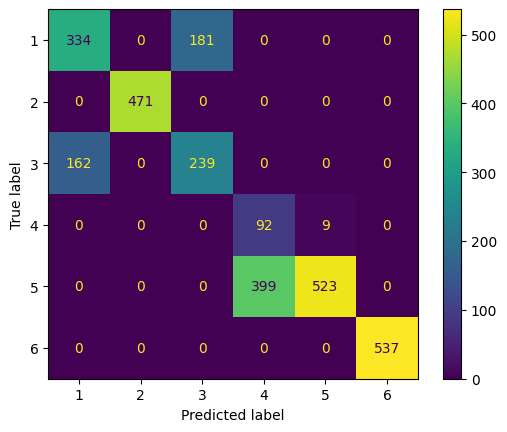

In [201]:

ConfusionMatrixDisplay.from_predictions(previsoes, y_test)